<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/NLP_LAB_4_2403A52030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install & Import Required Libraries



In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

LOAD DATASET

In [ ]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")

df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Select Required Columns

In [ ]:
df = df[['description', 'points']]
df.dropna(inplace=True)


Create Sentiment Labels

In [ ]:
def sentiment_label(points):
    if points <= 85:
        return 'negative'
    elif points <= 89:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['points'].apply(sentiment_label)
df['sentiment'].value_counts()


,count
sentiment,
neutral,58966
positive,49045
negative,21960


Text Preprocessing
✔ Remove punctuation
✔ Lowercase
✔ Tokenize
✔ Remove stopwords

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['description'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,points,sentiment,clean_text
0,"Aromas include tropical fruit, broom, brimston...",87,neutral,aromas include tropical fruit broom brimstone ...
1,"This is ripe and fruity, a wine that is smooth...",87,neutral,ripe fruity wine smooth still structured firm ...
2,"Tart and snappy, the flavors of lime flesh and...",87,neutral,tart snappy flavors lime flesh rind dominate g...
3,"Pineapple rind, lemon pith and orange blossom ...",87,neutral,pineapple rind lemon pith orange blossom start...
4,"Much like the regular bottling from 2012, this...",87,neutral,much like regular bottling comes across rather...


Cleaned Corpus

In [ ]:
df[['description', 'clean_text']].head()


,description,clean_text
0,"Aromas include tropical fruit, broom, brimston...",aromas include tropical fruit broom brimstone ...
1,"This is ripe and fruity, a wine that is smooth...",ripe fruity wine smooth still structured firm ...
2,"Tart and snappy, the flavors of lime flesh and...",tart snappy flavors lime flesh rind dominate g...
3,"Pineapple rind, lemon pith and orange blossom ...",pineapple rind lemon pith orange blossom start...
4,"Much like the regular bottling from 2012, this...",much like regular bottling comes across rather...


Extract Negative Reviews

In [ ]:
negative_reviews = df[df['sentiment'] == 'negative']
negative_reviews.shape


(21960, 4)

Compute TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(negative_reviews['clean_text'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

tfidf_df.head()


,acidity,aromas,berry,cherry,drink,dry,finish,flavors,fresh,fruit,green,light,nose,notes,palate,red,soft,sweet,tannins,wine
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.554917,0.000000,0.0,0.576641,0.0,0.0,0.0,0.000000,0.599627,0.0,0.000000,0.0,0.0,0.000000
1,0.452887,0.40357,0.000000,0.528169,0.000000,0.0,0.412014,0.000000,0.0,0.428143,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,0.590279,0.00000,0.000000,0.000000,0.680331,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.434419
3,0.000000,0.00000,0.800226,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.599699,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.351637,0.0,0.000000,0.0,0.0,0.0,0.686978,0.000000,0.0,0.635935,0.0,0.0,0.000000


Top TF-IDF Terms (Negative Sentiment)

In [ ]:
top_terms = tfidf_df.mean().sort_values(ascending=False)
top_terms


,0
flavors,0.190407
wine,0.187286
aromas,0.127258
fruit,0.125944
finish,0.122544
acidity,0.105796
palate,0.105203
sweet,0.083584
drink,0.079247
cherry,0.078811


Visualization – Bar Chart

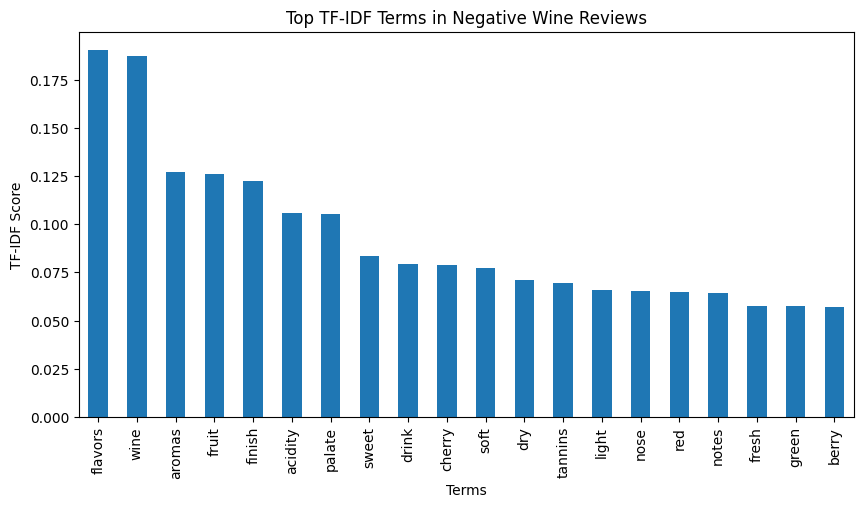

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_terms.plot(kind='bar')
plt.title("Top TF-IDF Terms in Negative Wine Reviews")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()


Visualization – Word Cloud

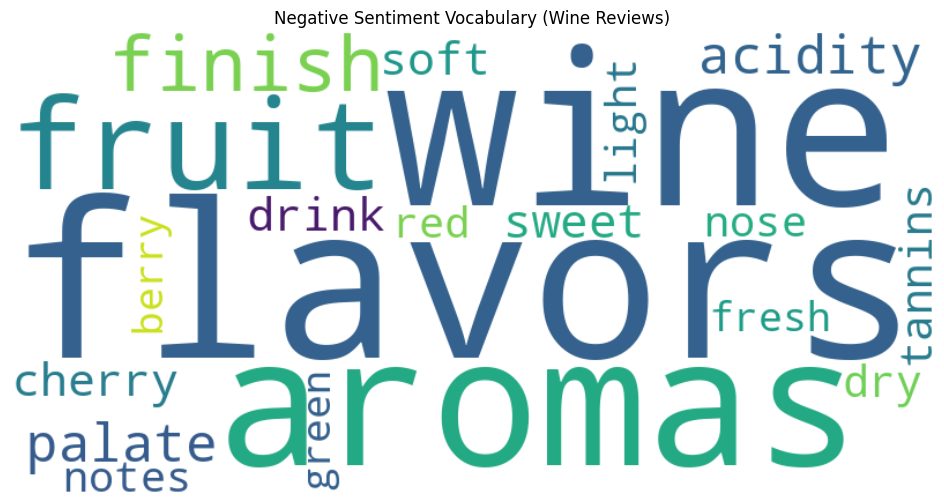

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_terms)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Vocabulary (Wine Reviews)")
plt.show()
